In [1]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [160]:
database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/'
buoyfile = database + 'filt-3D/NATL60-CJM165_y2013m03d01.1d_buoyancy_filt-n80-f0.0125.nc'
wfile = database + 'filt-3D/NATL60-CJM165_y2013m03d01.1d_vovecrtz_filt-n80-f0.0125.nc'
maskfile= '/media/extra/DATA/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'

In [16]:
dep=xr.open_dataset(buoyfile)['deptht']

In [144]:
def get_values_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[:,0:139,jmin:jmax+1,imin:imax+1]
    return values


In [161]:
def Estimate_wb(box,buoy,w):
    buoy_box = get_values_in_box(box,buoy)
    w_box = get_values_in_box(box,w)  
    
    tmask_box = get_values_in_box(box,tmask)
    wmask_box = get_values_in_box(box,wmask)
    
    buoy_box_mask = buoy_box*tmask_box
    w_box_mask = w_box*wmask_box
    
    wb_box_mask = buoy_box_mask*w_box_mask
    avg_wb_box = wb_box_mask.mean(dim=['0','1','2'])
    print 'wb = ', avg_wb_box.shape
    return avg_wb_box

In [137]:
def Estimate_buoy(box,buoy):
    buoy_box = get_values_in_box(box,buoy)
    # - compute average
    avg_buoy_box = buoy_box.mean(dim=['time_counter','x','y'])
    return avg_buoy_box

In [138]:
def get_wb_in_boxes(buoyfile,wfile):
    global boxes
    buoy = xr.open_dataset(buoyfile)['sobuoy']
    w = xr.open_dataset(wfile)['vovecrtz']
    tmask = xr.open_dataset(maskfile)['tmaskutil']
    wmask = xr.open_dataset(maskfile)['fmaskutil']
    _wb_arr=[]
    for box in boxes:
        wb = Estimate_wb(box,buoy,w,tmask,wmask)
        _wb_arr.append(wb)
    wb_arr = np.array(_wb_arr)
    return wb_arr

In [139]:
def get_b_in_boxes(buoyfile):
    global boxes
    buoy = xr.open_dataset(buoyfile)['sobuoy']
    print buoy.shape
    _buoy_arr=[]
    for box in boxes:
        print box.name
        b = Estimate_buoy(box,buoy)
        _buoy_arr.append(b)
    buoy_arr = np.array(_buoy_arr)
    return buoy_arr

In [140]:
def get_w_in_boxes(buoyfile):
    global boxes
    wds = xr.open_dataset(wfile)['vovecrtz']
    _w_arr=[]
    for box in boxes:
        w = Estimate_buoy(box,wds)
        _w_arr.append(w)
    w_arr = np.array(_w_arr)
    return w_arr

In [143]:
wb_boxes_yr = get_wb_in_boxes(buoyfile,wfile)

in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 139, 3454, 5422)
in get (1, 300, 3454, 5422)
(139,)
wb =  (139,)
in get (1, 1

In [117]:
b_boxes_yr = get_b_in_boxes(buoyfile)

(1, 139, 3454, 5422)
Box_14
in get (1, 139, 3454, 5422)
Box_13
in get (1, 139, 3454, 5422)
Box_12
in get (1, 139, 3454, 5422)
Box_11
in get (1, 139, 3454, 5422)
Box_10
in get (1, 139, 3454, 5422)
Box_7
in get (1, 139, 3454, 5422)
Box_6
in get (1, 139, 3454, 5422)
Box_5
in get (1, 139, 3454, 5422)
Box_4
in get (1, 139, 3454, 5422)
Box_3
in get (1, 139, 3454, 5422)
Box_2
in get (1, 139, 3454, 5422)
Box_1
in get (1, 139, 3454, 5422)
Box_9
in get (1, 139, 3454, 5422)
Box_8
in get (1, 139, 3454, 5422)


In [123]:
w_boxes_yr = get_w_in_boxes(wfile)

in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)
in get (1, 300, 3454, 5422)


In [79]:
wb_boxes_yr.shape

(14, 139)

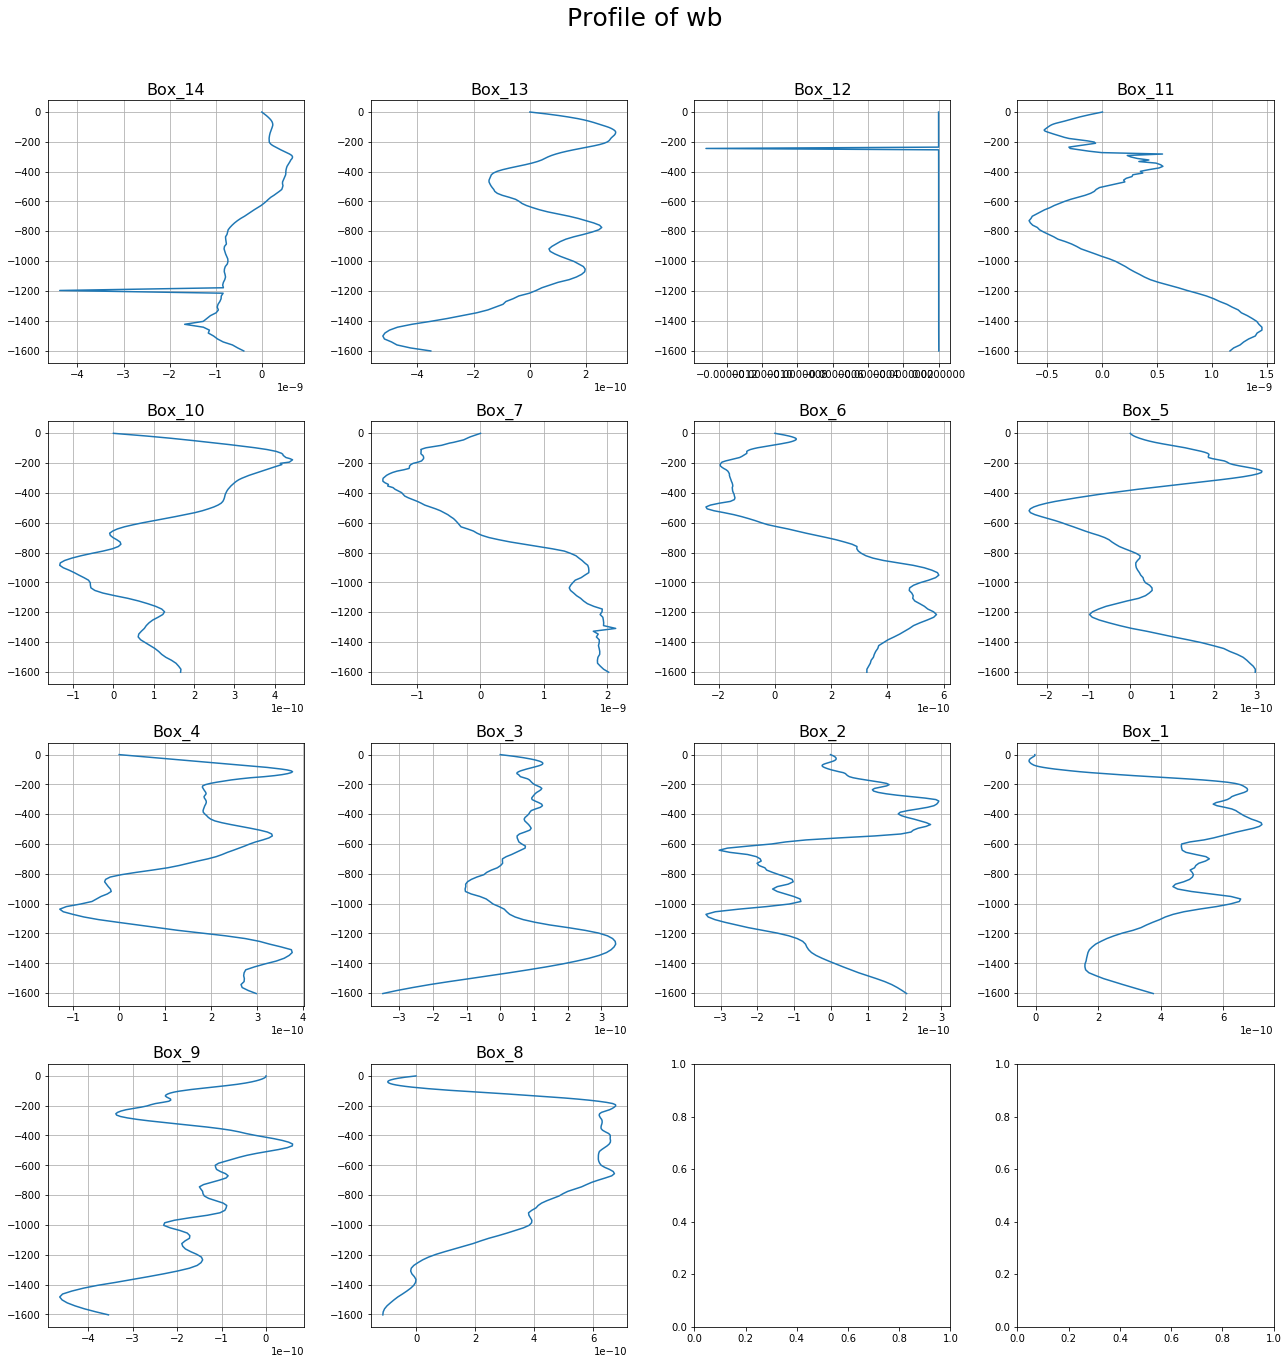

In [145]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of wb'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(wb_boxes_yr[k,:],-1*dep)
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    i = i + 1
    fig.tight_layout()
    
#plt.savefig("NATL60_sub_vert_buoy_flx_2param_march.png")

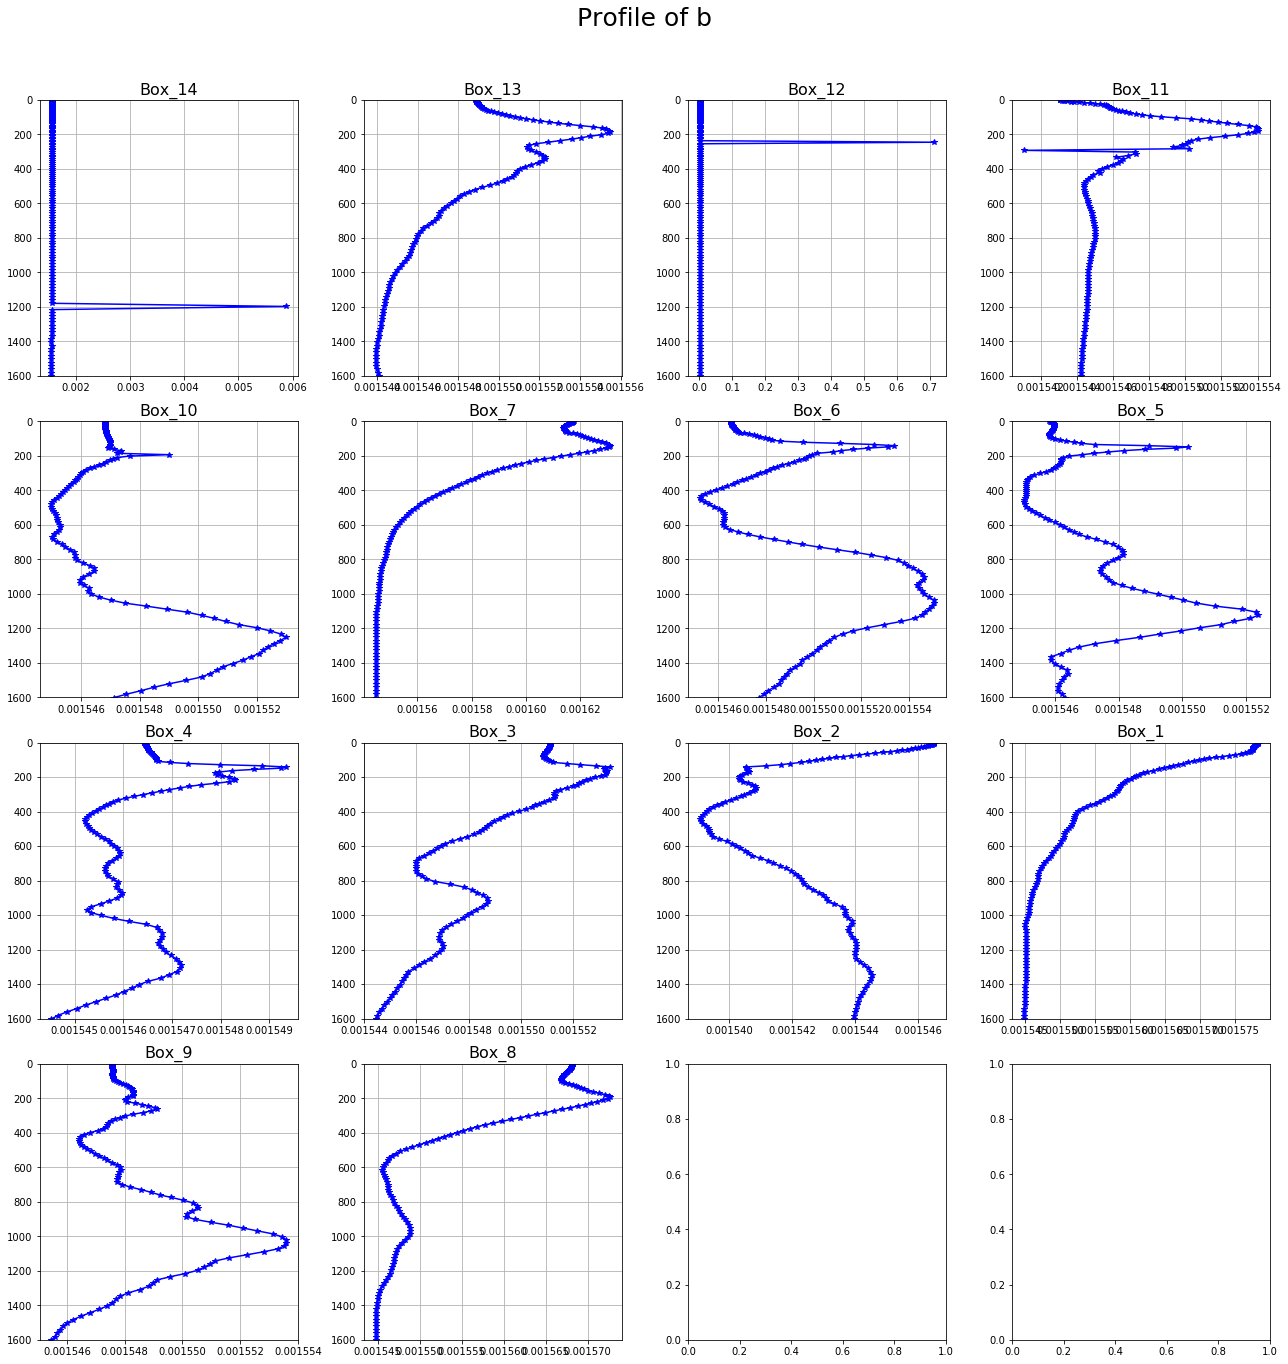

In [159]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of b'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(b_boxes_yr[k,:],dep,'b*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(1600,0)
    i = i + 1
    fig.tight_layout()
    
#plt.savefig("NATL60_sub_vert_buoy_flx_2param_march.png")

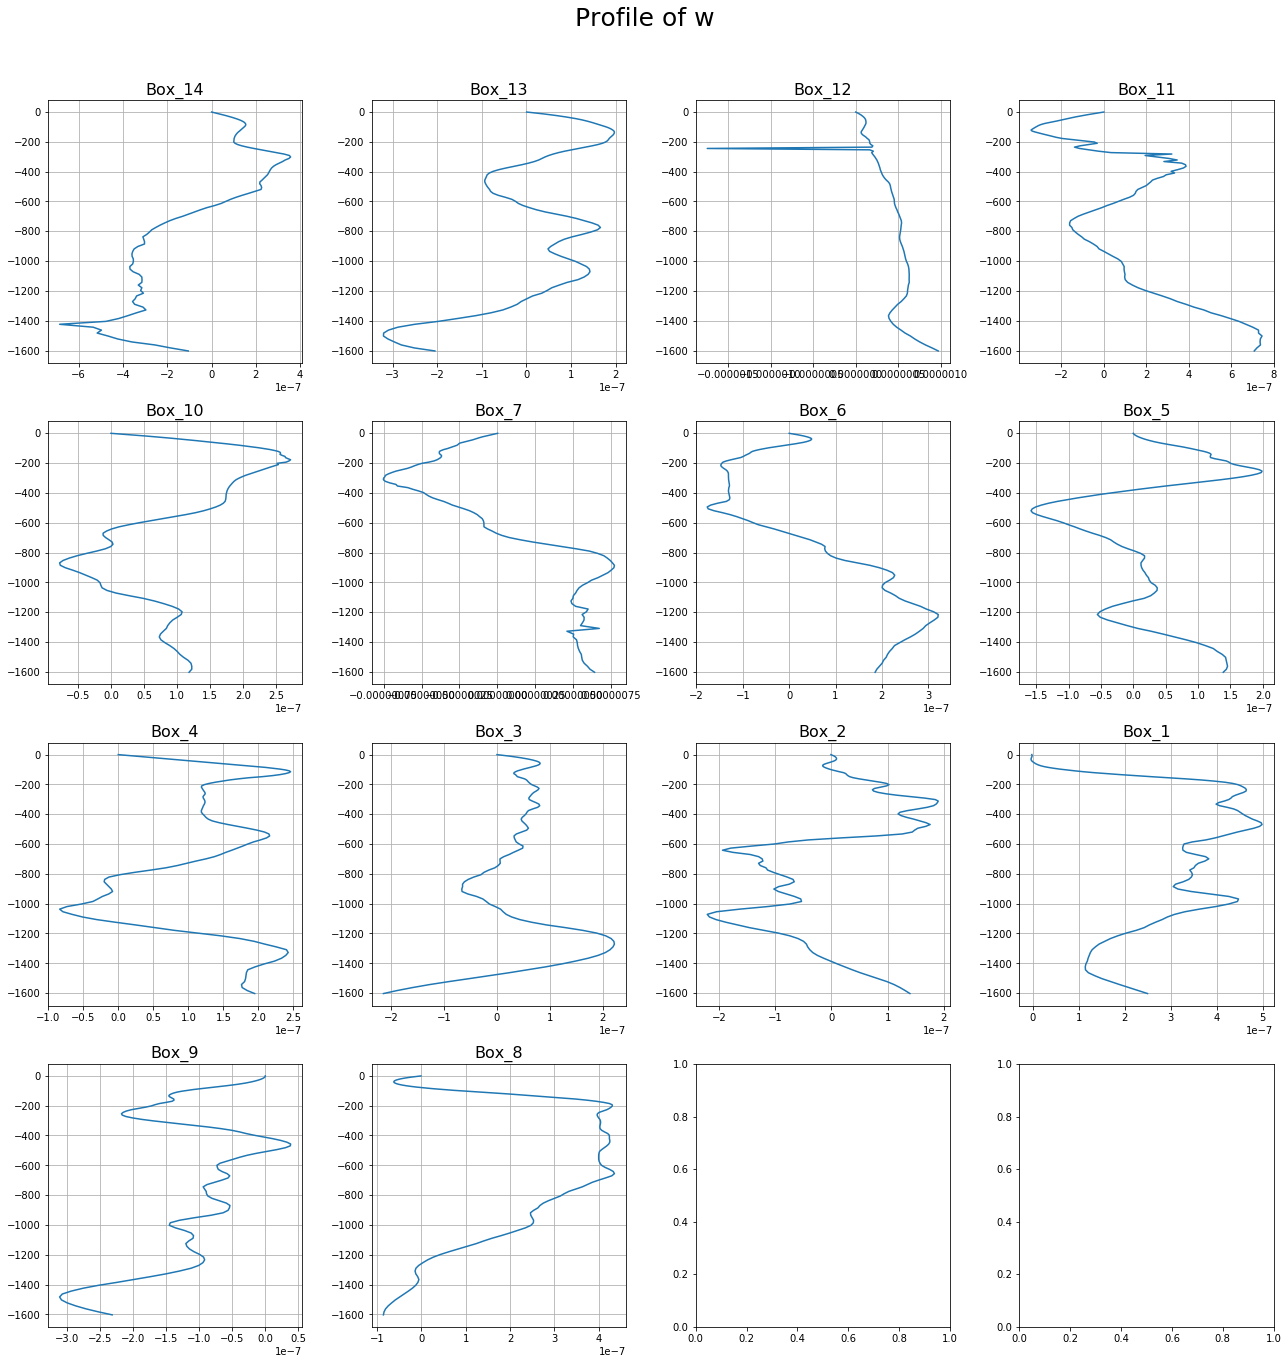

In [124]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of w'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(w_boxes_yr[k,:],-1*dep)
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    i = i + 1
    fig.tight_layout()
    
#plt.savefig("NATL60_sub_vert_buoy_flx_2param_march.png")

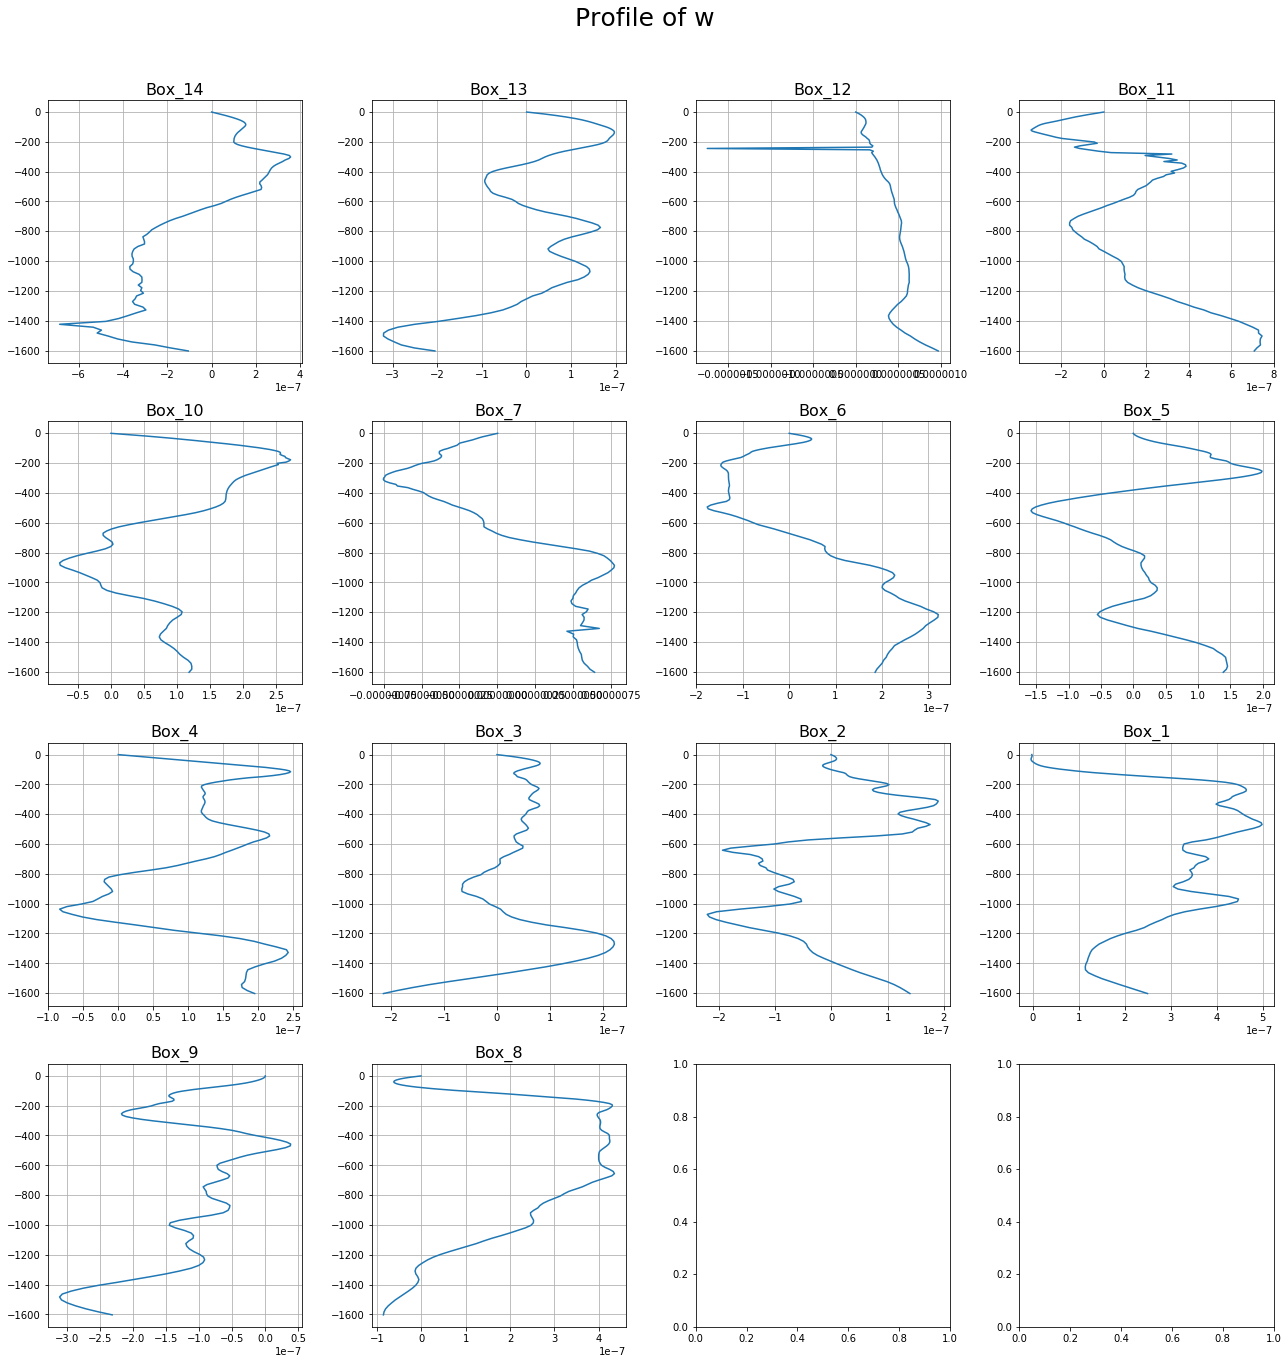

In [127]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of w'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(w_boxes_yr[k,:],-1*dep)
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    i = i + 1
    fig.tight_layout()
    
#plt.savefig("NATL60_sub_vert_buoy_flx_2param_march.png")

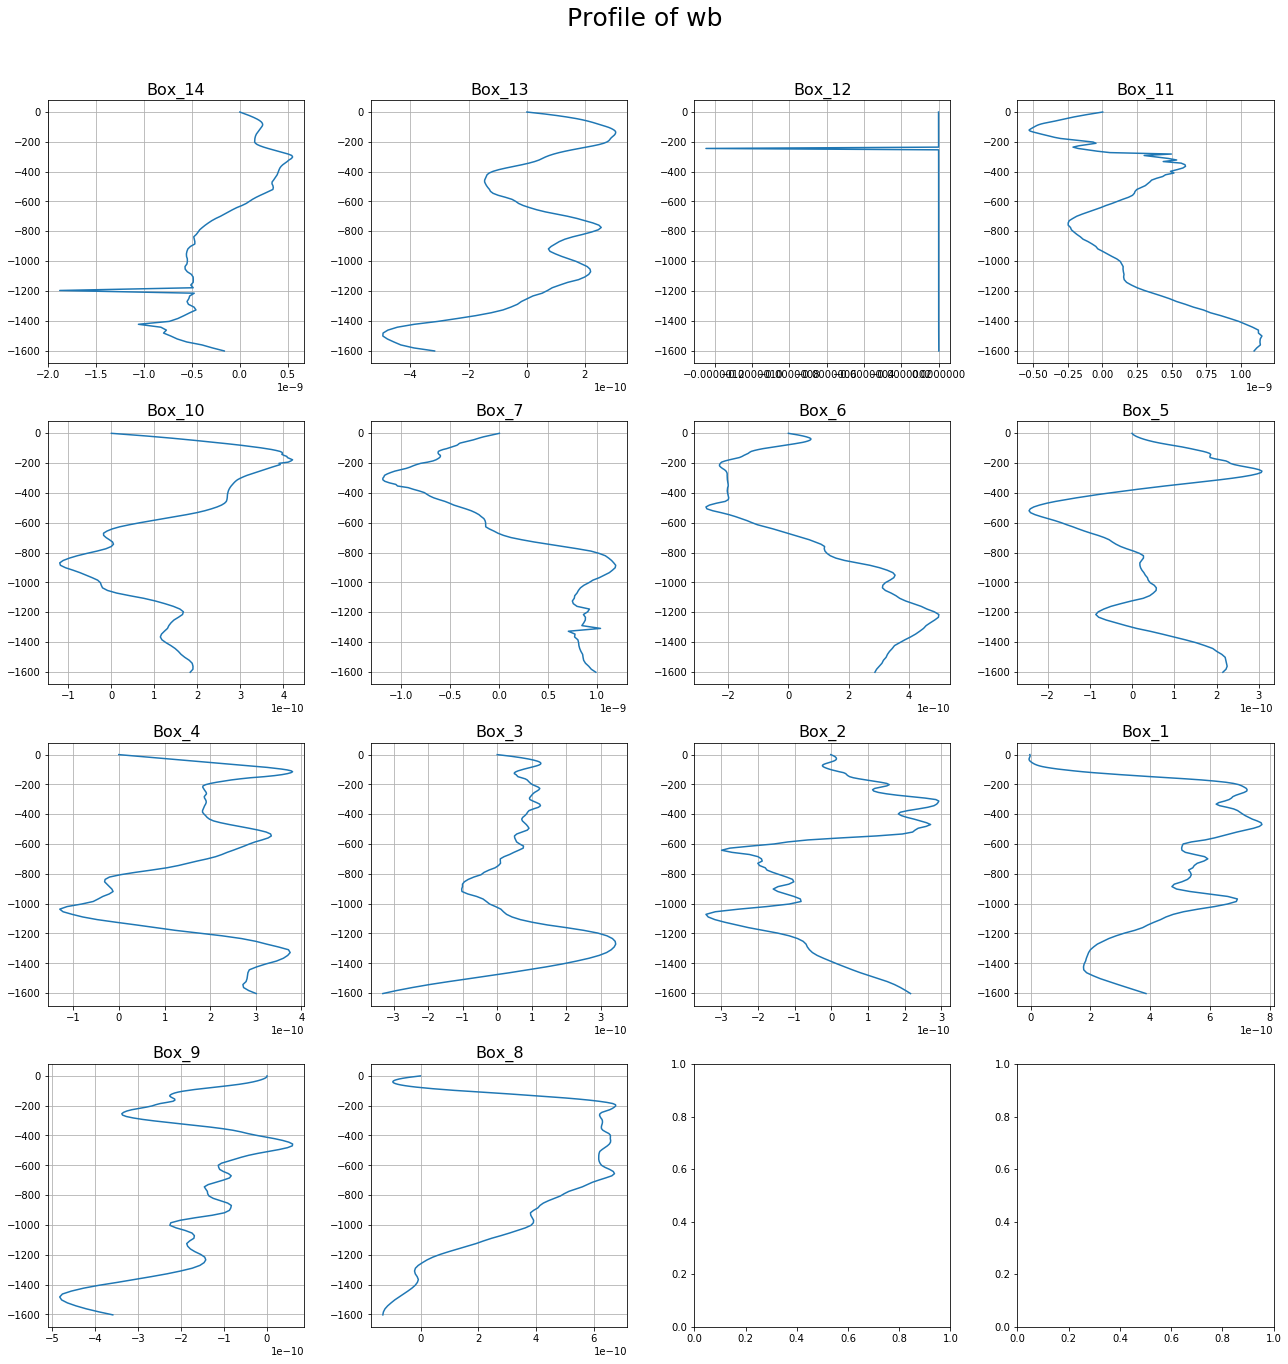

In [80]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Profile of wb'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(wb_boxes_yr[k,:],-1*dep)
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    i = i + 1
    fig.tight_layout()
    
#plt.savefig("NATL60_sub_vert_buoy_flx_2param_march.png")

In [81]:
def get_indices_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    return imin,imax,jmin,jmax


In [83]:
for k,box in enumerate(boxes):
    buoy = xr.open_dataset(buoyfile)['sobuoy']
    imin,imax,jmin,jmax=get_indices_box(box,buoy)
    print 'box n',box.name,' indices = ',imin,imax,jmin,jmax
    


box n Box_14  indices =  3374 3926 1780 2698
box n Box_13  indices =  2813 3375 1773 2696
box n Box_12  indices =  2309 2835 1777 2742
box n Box_11  indices =  1761 2239 1833 2785
box n Box_10  indices =  3681 4247 962 1778
box n Box_7  indices =  1931 2494 968 1802
box n Box_6  indices =  3684 4286 232 963
box n Box_5  indices =  3088 3686 232 957
box n Box_4  indices =  2491 3087 232 959
box n Box_3  indices =  1891 2488 232 961
box n Box_2  indices =  1288 1889 234 974
box n Box_1  indices =  695 1295 236 993
box n Box_9  indices =  3088 3676 957 1770
box n Box_8  indices =  2493 3088 958 1783


In [84]:
buoy = xr.open_dataset(buoyfile)['sobuoy']
buoy12 = buoy[0,:,2309:2835,1777:2742]

In [85]:
buoy12.shape

(139, 526, 965)

In [88]:
print buoy12[2,:,:].values

[[ -2.90830430e-05  -9.88438333e-05  -1.79126742e-04 ...,   1.55011320e-03
    1.51835906e-03   1.47157861e-03]
 [ -1.08070570e-04  -1.80776609e-04  -2.60940054e-04 ...,   1.42856396e-03
    1.39908015e-03   1.35927403e-03]
 [ -2.13065883e-04  -2.93095480e-04  -3.72563431e-04 ...,   1.36562192e-03
    1.35432172e-03   1.34686846e-03]
 ..., 
 [  1.44589460e-03   1.47830264e-03   1.51256181e-03 ...,   1.32668635e-03
    1.31164514e-03   1.30335451e-03]
 [  1.50223635e-03   1.54179579e-03   1.58444350e-03 ...,   1.33059779e-03
    1.32749439e-03   1.33146974e-03]
 [  1.56098010e-03   1.59487780e-03   1.60408579e-03 ...,   1.34779373e-03
    1.35515153e-03   1.36745314e-03]]


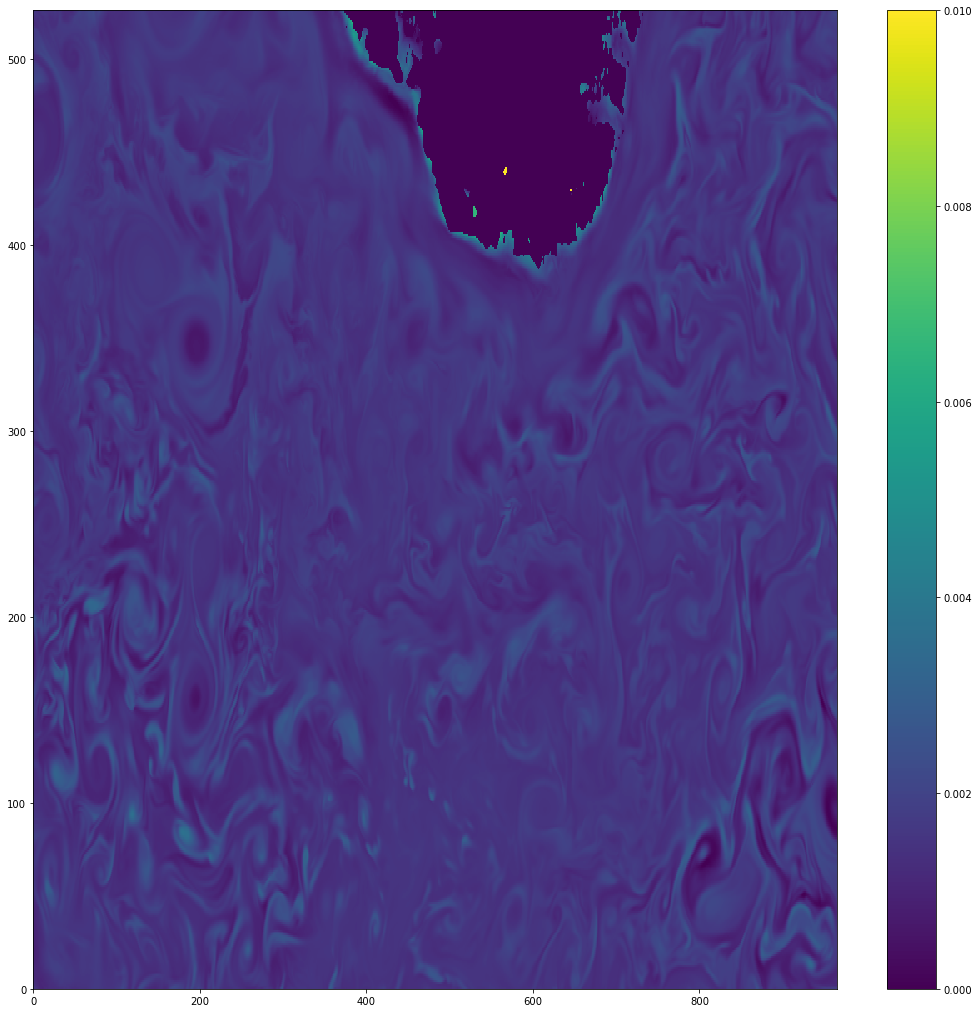

In [146]:
fig, axs = plt.subplots(1,1, figsize=(18, 18))
plt.pcolormesh(buoy12[50,:,:],vmin=0,vmax=0.01)
plt.colorbar()

In [158]:
buoy12[12,:,:].mean()

<xarray.DataArray 'sobuoy' ()>
array(0.001548716868103599)
Coordinates:
    deptht        float32 23.9106
    time_counter  datetime64[ns] 2013-03-01T12:01:04

In [97]:
w = xr.open_dataset(wfile)['vovecrtz']
w12 = w[0,:,2309:2835,1777:2742]

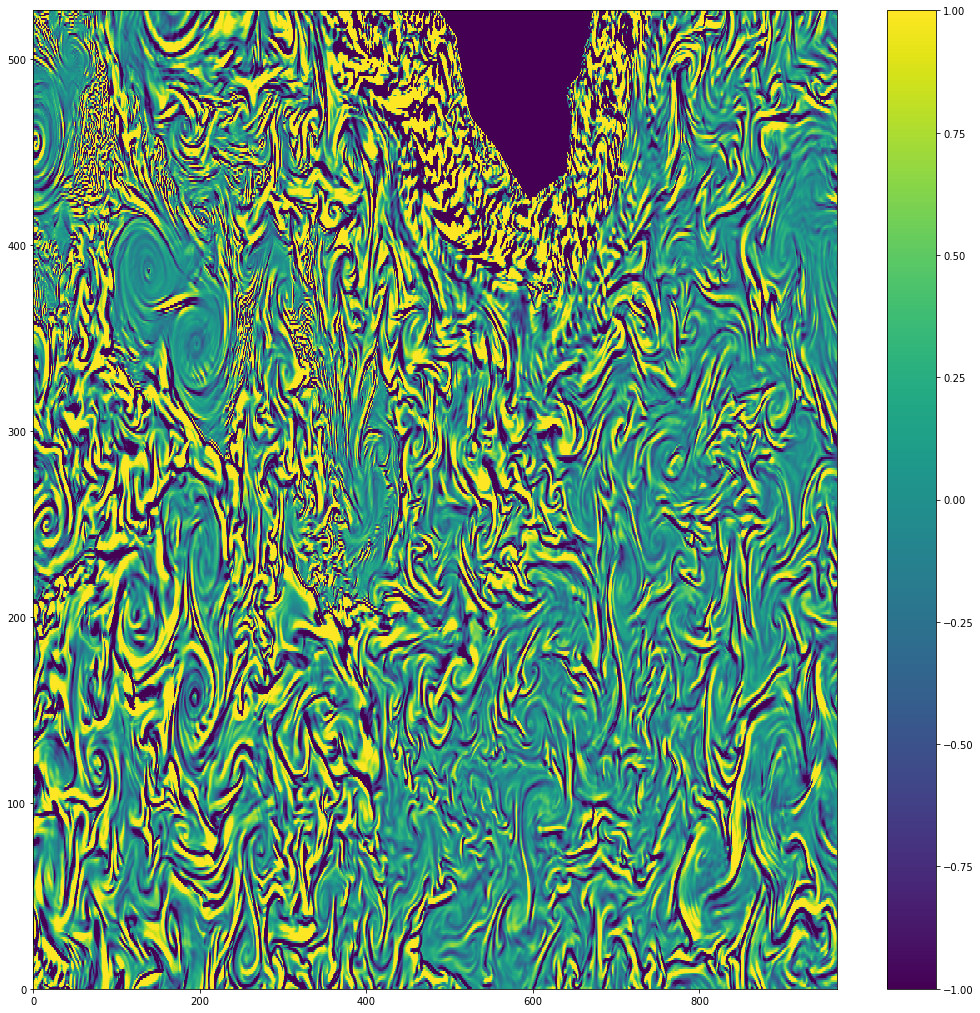

In [103]:
fig, axs = plt.subplots(1,1, figsize=(18, 18))
plt.pcolormesh(86400*w12[2,:,:],vmin=-1,vmax=1)
plt.colorbar()